# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. 

The attributes in the dataset are as follows; their names are self-explanatory: 
     

    longitude (continuous): One of the coordinates that are used to identify the California district block 
     

    latitude (continuous): One of the coordinates that are used to identify the California district block 
     

    housing_median_age (continuous): Average age of the house in California district block 
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block 
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block 
     

    population (continuous): Number of people residing in the district block 
     

    households (continuous): Number of families in the district block 
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 

## Import Libraries
Import all necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from google.colab import files
 
 
uploaded = files.upload()

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [6]:
df = pd.read_csv("housing.csv")
df.shape

(20640, 10)

3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [7]:
df.isna().sum()
df = df.dropna()
df.shape

(20433, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`. 

In [9]:
corr_df = df.drop(["latitude", "longitude", "ocean_proximity"], axis=1)
corr_values = corr_df.corrwith(df["median_house_value"], method="pearson")

In [10]:
print('Feature Name\tPearson Correlation')
for i, val in corr_values.items():
    print(i, '\t', round(val, 2))

Feature Name	Pearson Correlation
housing_median_age 	 0.11
total_rooms 	 0.13
total_bedrooms 	 0.05
population 	 -0.03
households 	 0.06
median_income 	 0.69
median_house_value 	 1.0


5. Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above). 

In [11]:
X = df.drop('median_house_value', axis=1)
Y = df['median_house_value']

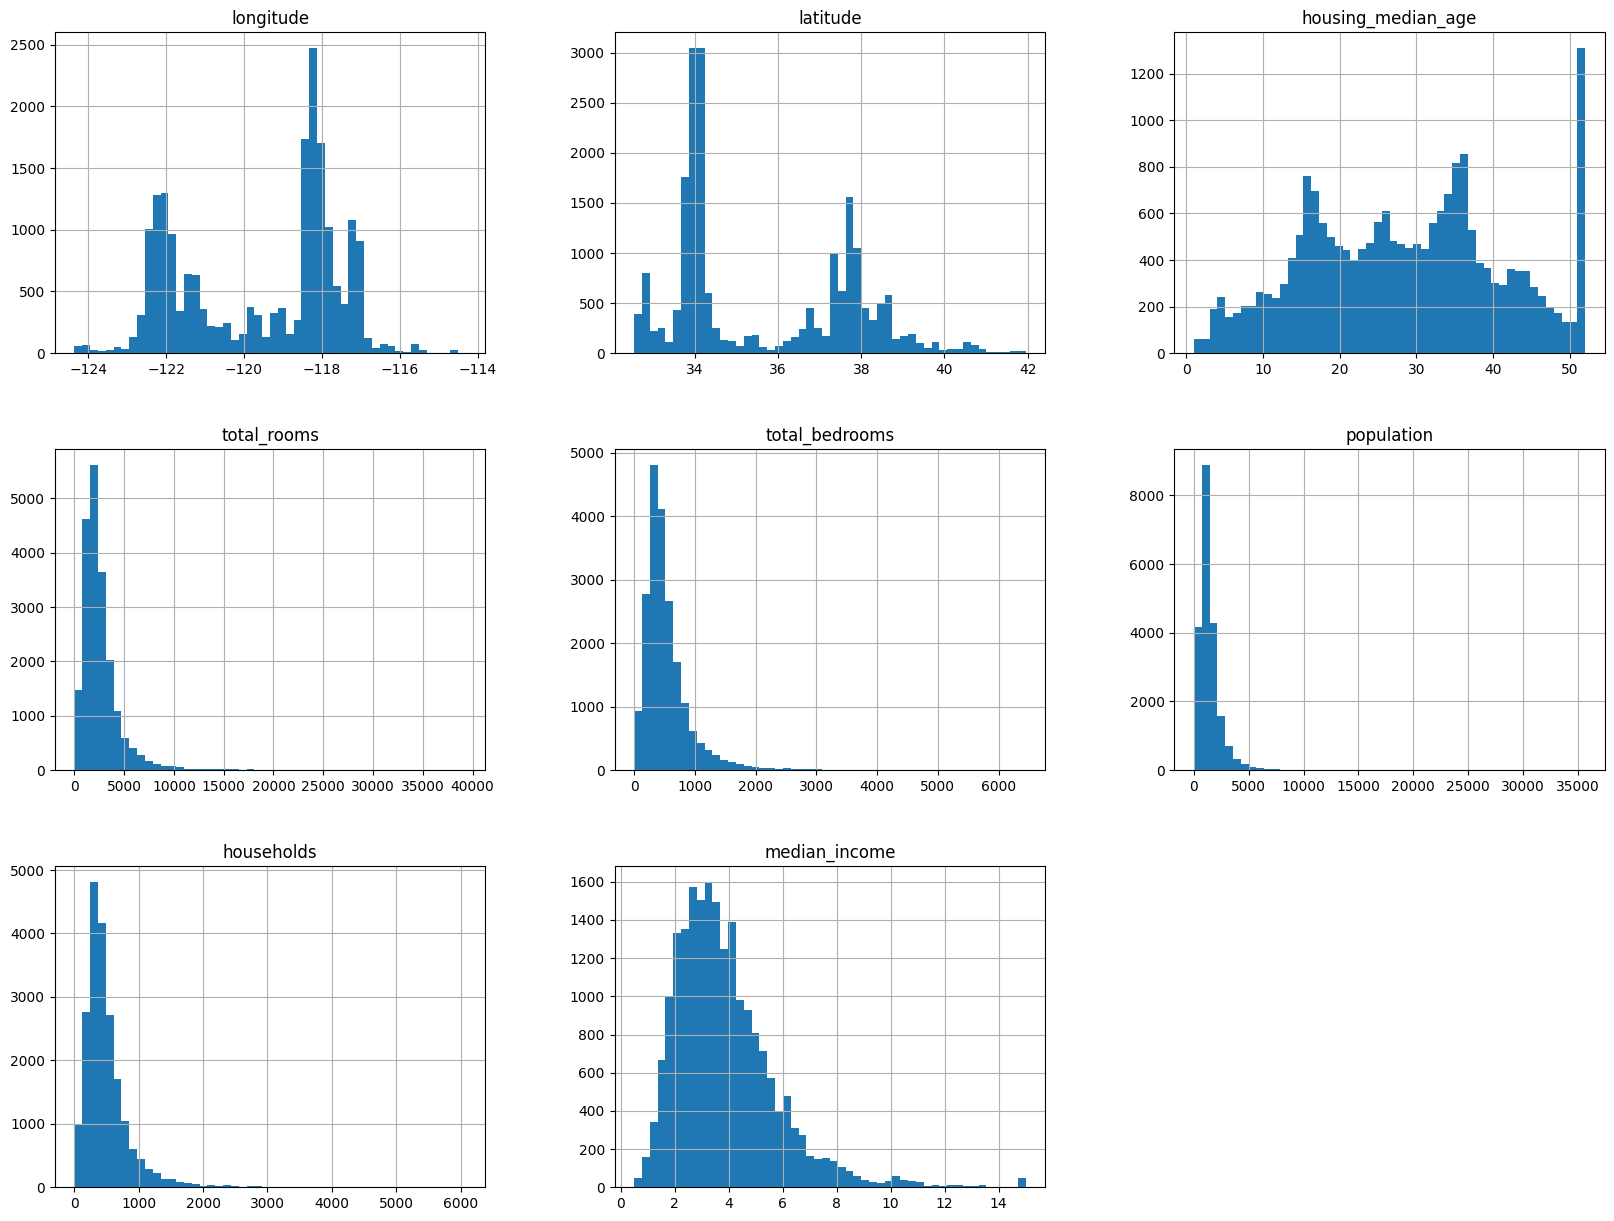

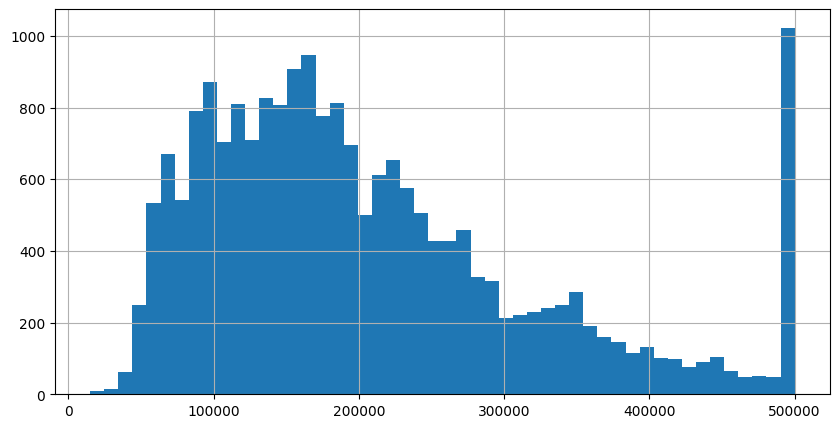

In [14]:
X.hist(bins =50, figsize=(20,15))
plt.show()
Y.hist(bins =50, figsize=(10,5))
plt.show()

#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

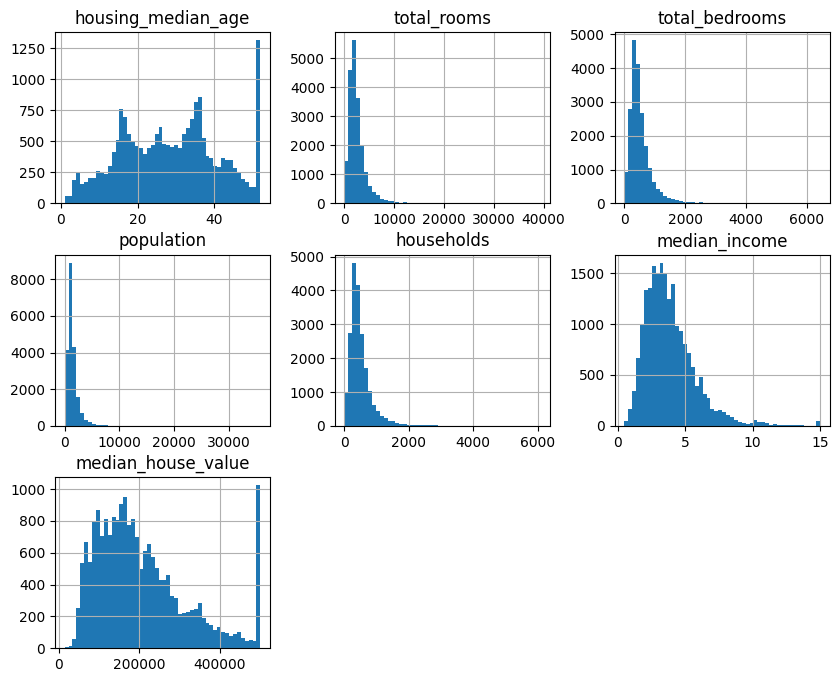

In [12]:

cols = ["housing_median_age", "total_rooms", "total_bedrooms", 
        "population", "households", "median_income", "median_house_value"]
data = df[cols]

data.hist(bins=50, figsize=(10,8))

plt.show()

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [15]:
print(X.describe())


          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  
count    20433.000000  20433.000000  20433.000000   20433.000000  
mean       537.870553   1424.946949    499.433465       3.871162  
std        421.385070   1133.208490    382.299226       1.899291  
min          1.000000      3.000000      1.000000       0.499900  
25%        296.000000    

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity 

In [17]:
X  = pd.get_dummies(X,columns=['ocean_proximity'])

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [18]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values. 

In [19]:
# Instantiate separate StandardScaler objects for features and targets
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [20]:
X_train = scaler_X.fit_transform(X_train)

Y_train = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))

3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [21]:
X_test = scaler_X.transform(X_test)
Y_test = scaler_Y.transform(Y_test.values.reshape(-1, 1))

4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot. 

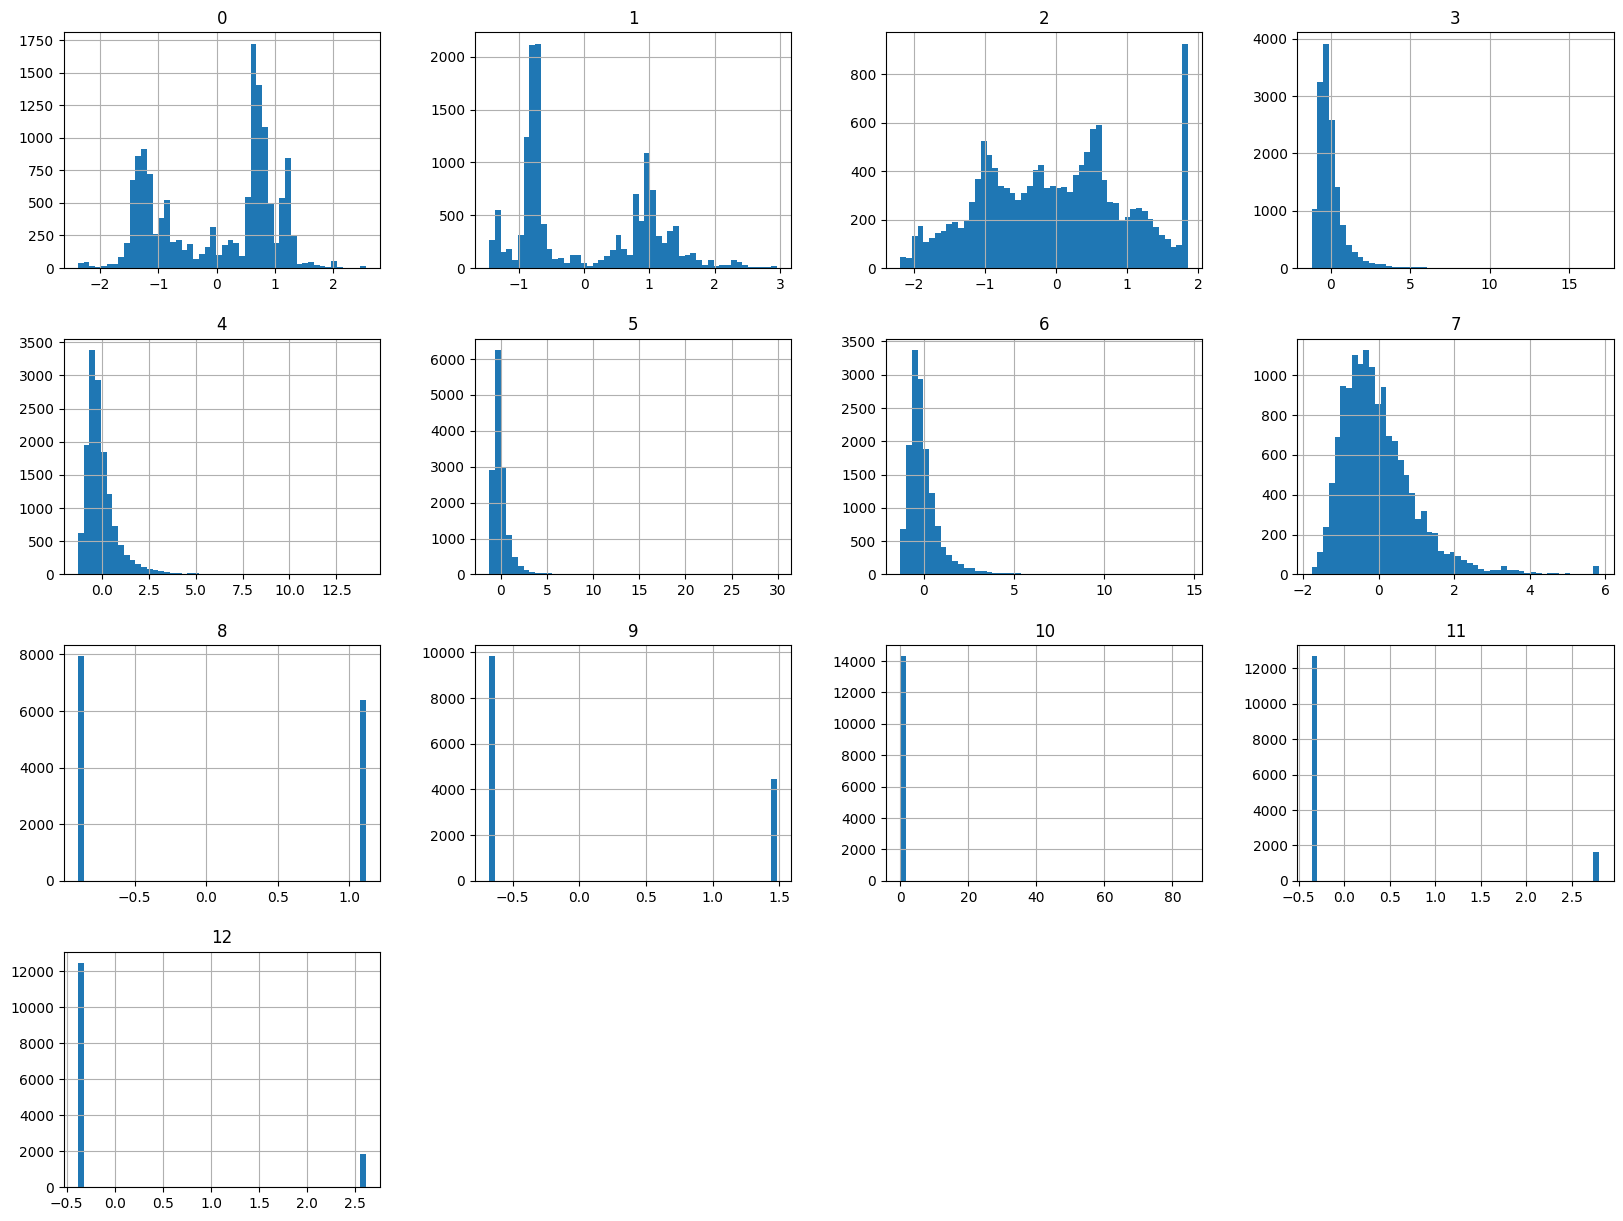

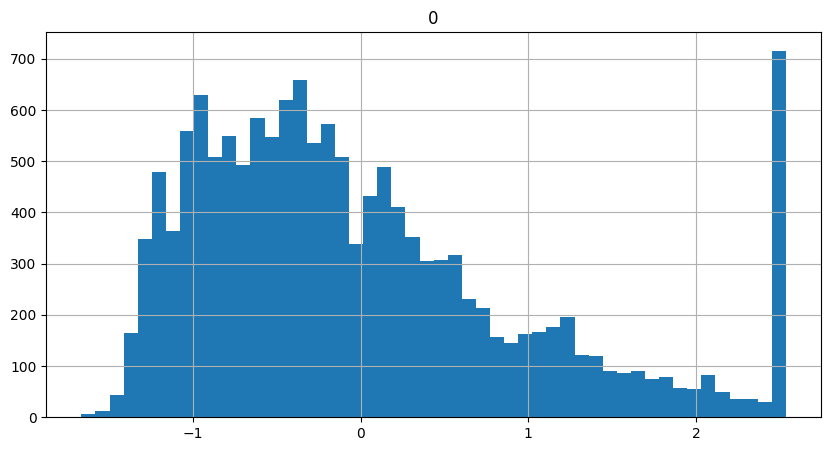

In [23]:
pd.DataFrame(X_train).hist(bins=50, figsize=(20,15))
plt.show()
pd.DataFrame(Y_train).hist(bins=50, figsize=(10,5))
plt.show()

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [24]:
lr = LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [25]:
lr.fit(X_train, Y_train)

LinearRegression()

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space). 

In [26]:
Y_preds = lr.predict(X_test)

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [27]:
Y_preds = scaler_Y.inverse_transform(Y_preds)

#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

In [28]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

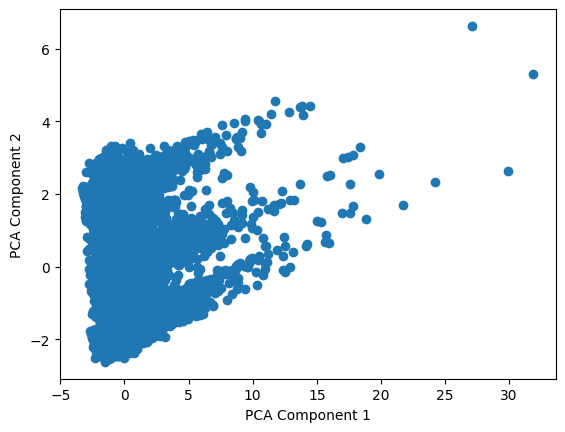

In [29]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

In [30]:
variance_ratio = np.sum(pca.explained_variance_ratio_)
print('Total variance captured by 2 PCA components:', round(variance_ratio*100, 2), '%')

Total variance captured by 2 PCA components: 49.85 %


In [31]:
print('Strength of each PCA component:', pca.singular_values_)

Strength of each PCA component: [236.61630546 191.59606813]


### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

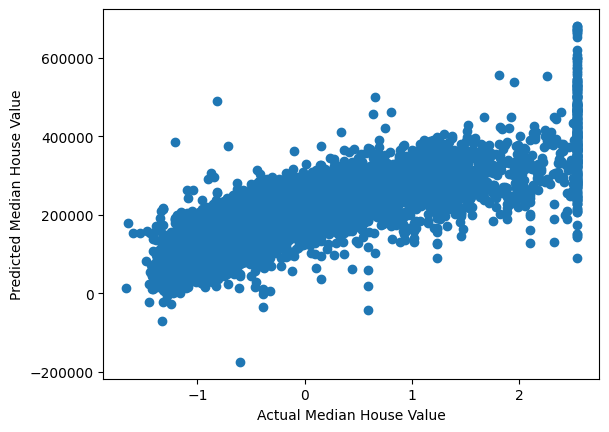

In [32]:
plt.scatter(Y_test, Y_preds)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

In [33]:
mape = mean_absolute_percentage_error(Y_test, Y_preds)
rmse = mean_squared_error(Y_test, Y_preds, squared=False)
r2 = r2_score(Y_test, Y_preds)

In [34]:
print('Model\tMAPE\tRMSE\tR2')
print('Linear Regression\t', round(mape, 2), '\t', round(rmse, 2), '\t', round(r2, 2))

Model	MAPE	RMSE	R2
Linear Regression	 1680878.55 	 225576.91 	 -50848940798.17
